In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [60]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [61]:
x

array([[ 1.10871649, -3.4070316 ],
       [ 8.91299412,  5.79953236],
       [ 1.04392547, -1.19575747],
       ...,
       [ 5.78247556, -8.3600337 ],
       [ 8.24181848,  5.03573033],
       [ 2.24639268,  0.94373387]])

In [62]:
y

array([1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0,

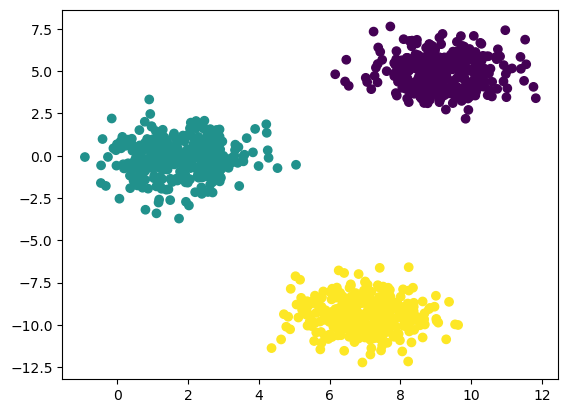

In [63]:
plt.scatter(x[:,0],x[:,1],c=y)

In [64]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [67]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [68]:
from sklearn.cluster import KMeans

In [69]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [70]:
wcss

[1339.9999999999986,
 627.4712942238754,
 78.34773393854402,
 65.91072677735676,
 50.72324859138381,
 47.64961766906749,
 35.638027755059014,
 32.365236764580104,
 30.582120835426153,
 27.36757232673554]

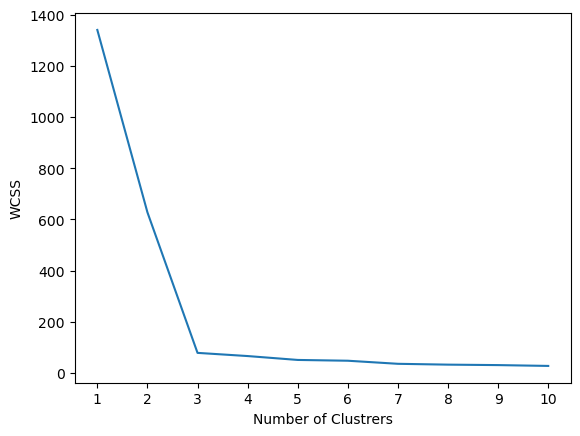

In [71]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [72]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [73]:
kmeans.fit_predict(x_train_scaled)

array([0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1,
       2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2,

In [74]:
y_pred=kmeans.predict(x_test_scaled)

In [75]:
y_pred

array([0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1,
       2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0,
       2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2,
       1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0,

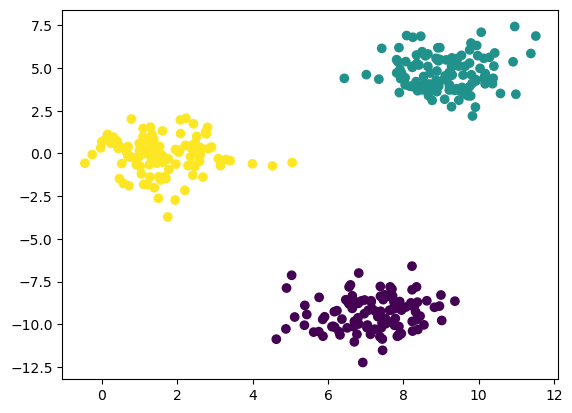

In [76]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [77]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [78]:
from kneed import KneeLocator

In [79]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [80]:
kl.elbow

3

In [81]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [82]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [83]:
silhouette_coefficients

[0.5820073935801005,
 0.8109258022070636,
 0.6791036744249237,
 0.5556322730046497,
 0.5155638278940131,
 0.4041311880410145,
 0.4025769717877275,
 0.378320737361412,
 0.31653821365434903]

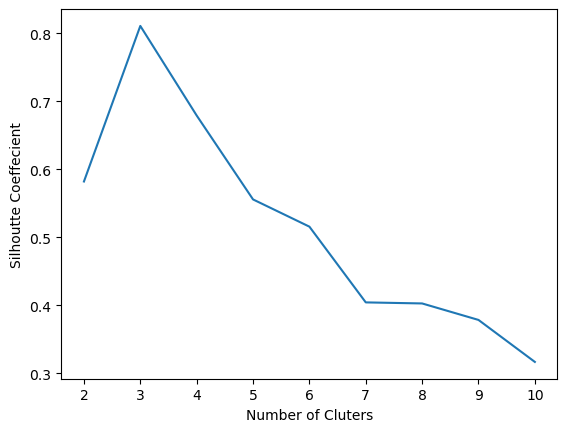

In [84]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()